In [28]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt
import os

In [29]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

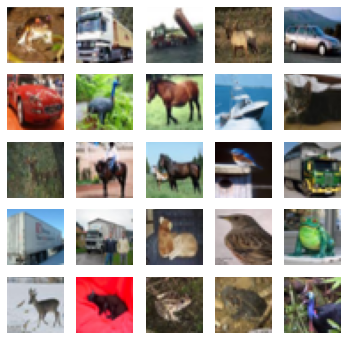

In [30]:
plt.figure(figsize=(6,6))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')

plt.show()

In [31]:
x_train = x_train.reshape(-1,32,32,3)
x_test = x_test.reshape(-1,32,32,3)

print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [32]:
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(64,(3,3),activation='relu',padding='same'))
cnn.add(Conv2D(64,(3,3),activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(64,(3,3),activation='relu',padding='same'))
cnn.add(Conv2D(64,(3,3),activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.3))

cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [33]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [34]:
from datetime import datetime

start_time = datetime.now()

hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=50, validation_data=(x_test, y_test))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/50
391/391 [==============================] - 7s 15ms/step - loss: 1.8895 - accuracy: 0.2962 - val_loss: 1.4828 - val_accuracy: 0.4592
Epoch 2/50
391/391 [==============================] - 5s 13ms/step - loss: 1.4666 - accuracy: 0.4677 - val_loss: 1.2525 - val_accuracy: 0.5579
Epoch 3/50
391/391 [==============================] - 5s 13ms/step - loss: 1.2850 - accuracy: 0.5417 - val_loss: 1.0679 - val_accuracy: 0.6169
Epoch 4/50
391/391 [==============================] - 5s 13ms/step - loss: 1.1730 - accuracy: 0.5853 - val_loss: 0.9933 - val_accuracy: 0.6472
Epoch 5/50
391/391 [==============================] - 5s 13ms/step - loss: 1.0874 - accuracy: 0.6197 - val_loss: 0.9544 - val_accuracy: 0.6624
Epoch 6/50
391/391 [==============================] - 5s 13ms/step - loss: 1.0229 - accuracy: 0.6403 - val_loss: 0.8689 - val_accuracy: 0.6909
Epoch 7/50
391/391 [==============================] - 5s 13ms/step - loss: 0.9721 - accuracy: 0.6600 - val_loss: 0.8223 - val_accuracy: 0.7174

In [35]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5592 - accuracy: 0.8184


[0.5591900944709778, 0.8184000253677368]

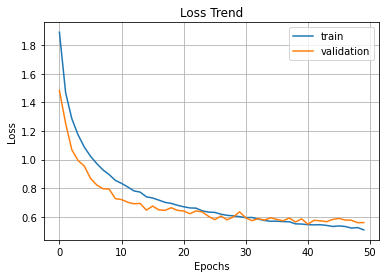

In [36]:
plt.title('Loss Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend(loc='best')
plt.show()

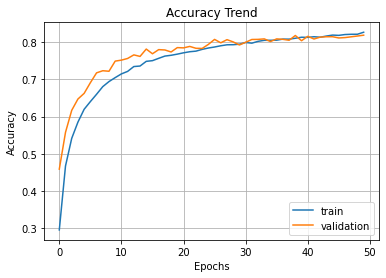

In [37]:
plt.title('Accuracy Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.legend(loc='best')
plt.show()

In [38]:
cnn.save ('./cifar10_accuracy_82v1.h5')